<a href="https://colab.research.google.com/github/SammyBrimberry/GoogleBigQuery_attritionClassification/blob/main/gbq_attrition_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# account authentication
from google.colab import auth
auth.authenticate_user()
print('Authenticated') # check

Authenticated


In [2]:

# import biqguery, this is where our csv is living
from google.cloud import bigquery

# view settings
%load_ext google.colab.data_table

In [3]:
# store project_id into object
project_id = 'civil-hope-323521'

In [4]:
# init gbq client for specific cloud project
client = bigquery.Client(project=project_id)

In [ ]:
# query our entire data living in google cloud
df = client.query('''
select * 
from `civil-hope-323521.attrition_dataset_1.IBM_attrition_2021` # project_id.database.table
''').to_dataframe()

df.head() # print out first 5 rows

Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   48      False  ...                       0                     0
1   45      False  ...                       0                     0
2   41      False  ...                       0                     0
3   57      False  ...                       0                     0
4   42      False  ...                       0                     0

[5 rows x 35 columns]

    f0_  attrition
0  1233      False
1   237       True


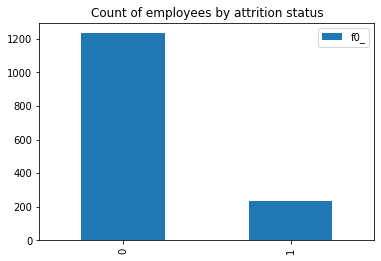

In [ ]:
# count number of attrition
# imbalanced classification problem
df = client.query('''
select count(attrition), attrition
from `civil-hope-323521.attrition_dataset_1.IBM_attrition_2021`
group by attrition
''').to_dataframe()

# plot output
df.plot(kind='bar',title = "Count of employees by attrition status")

print(df)

        f0_
0  2.645580
1  2.940928


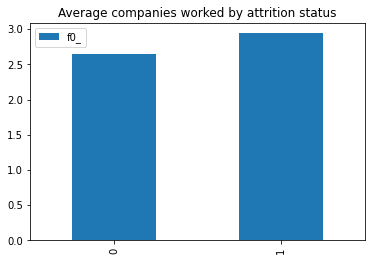

In [ ]:
# avg number of companies worked by attirition status
df = client.query('''
select avg(NumCompaniesWorked)
from `civil-hope-323521.attrition_dataset_1.IBM_attrition_2021`
group by attrition
''').to_dataframe()
print(df)
# plot data
df.plot(kind='bar',title = "Average companies worked by attrition status")

   satisfaction  Involvement  attrition
0      2.778589     2.770479      False
1      2.468354     2.518987       True


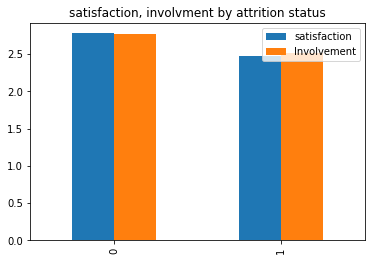

In [ ]:
# job satisfaction rating by attrition status
df = client.query('''
select avg(JobSatisfaction) as satisfaction, avg(JobInvolvement) as Involvement, attrition
from `civil-hope-323521.attrition_dataset_1.IBM_attrition_2021`
group by attrition
''').to_dataframe()
print(df)
# plot 
df.plot(kind='bar',title = "satisfaction, involvment by attrition status")

In [ ]:
# avg hourly rate, monthly rate and monlthy income for employees by attrition status and department
df = client.query('''
select avg(hourlyrate) as hrate, avg(dailyrate) as drate, department, attrition
from `civil-hope-323521.attrition_dataset_1.IBM_attrition_2021`
group by department, attrition
''').to_dataframe()
print(df)
# plot data
#df.plot(kind='bar',title = "rate(s) by department and attrition status")

       hrate       drate              department  attrition
0  65.889831  814.805085                   Sales      False
1  66.060386  815.252415  Research & Development      False
2  64.627451  751.921569         Human Resources      False
3  66.834586  754.548872  Research & Development       True
4  64.097826  744.369565                   Sales       True
5  62.916667  749.916667         Human Resources       True


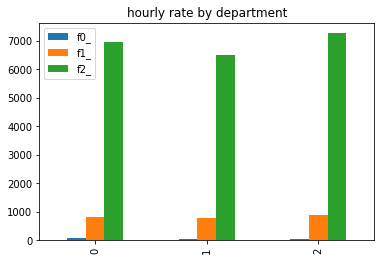

In [5]:
# avg hourly rate, monthly rate and monlthy income for female employees 
df = client.query('''
select avg(hourlyrate), avg(dailyrate), avg(monthlyincome)
from `civil-hope-323521.attrition_dataset_1.IBM_attrition_2021`
where gender = 'Female'
group by department 
''').to_dataframe()

# plot data
df.plot(kind='bar',title = "hourly rate by department")


department            
Research & Development    43
Sales                     38
Human Resources            6
dtype: int64


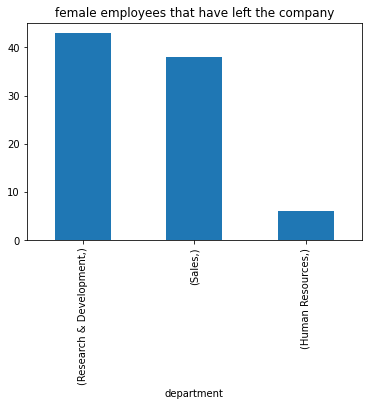

In [ ]:
# count department where attrition is true for female employees
df = client.query('''
select department
from `civil-hope-323521.attrition_dataset_1.IBM_attrition_2021`
where attrition=True and gender = "Female"''').to_dataframe()
print(df.value_counts())
# plot
df.value_counts().plot(kind='bar',title='female employees that have left the company')

In [6]:

# compare avg. salary hike split by attrition status
# 0 is no attrition
# 1 is attrition
df = client.query('''
select avg(PercentSalaryHike), attrition
from `civil-hope-323521.attrition_dataset_1.IBM_attrition_2021`
group by attrition
''').to_dataframe()

df.head()

f0_  attrition
0  15.231144      False
1  15.097046       True

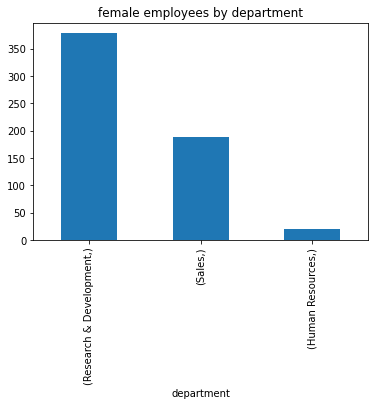

In [ ]:
# count of female identifying employees by department
df = client.query('''
select department
from `civil-hope-323521.attrition_dataset_1.IBM_attrition_2021`
where gender = "Female"''').to_dataframe()
print(df.value_counts())
# plot the count of df in a bar chart
df.value_counts().plot(kind = 'bar',title='female employees by department')

'\nthere seems to be more males working at the company than female\ncompare y-axis\n'

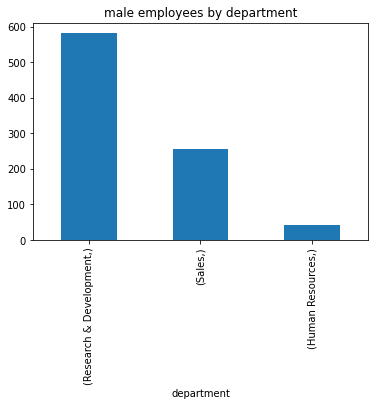

In [ ]:
# count of male identifying employees by department
df = client.query('''
select department
from `civil-hope-323521.attrition_dataset_1.IBM_attrition_2021`
where gender = "Male"''').to_dataframe()
df.value_counts().plot(kind = 'bar', title='male employees by department')

'''
there seems to be more males working at the company than female
compare y-axis
'''

# Classification using simple logistic reggression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids

In [ ]:
# query our entire data living in google cloud
df = client.query('''
select * 
from `civil-hope-323521.attrition_dataset_1.IBM_attrition_2021` # project_id.database.table
''').to_dataframe()

df.head() # print out first 5 rows

Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   48      False  ...                       0                     0
1   45      False  ...                       0                     0
2   41      False  ...                       0                     0
3   57      False  ...                       0                     0
4   42      False  ...                       0                     0

[5 rows x 35 columns]

In [ ]:
# define features
X = df.drop(columns='Attrition')
X = pd.get_dummies(X)
# set target
target = ['Attrition'] # we want to predict this value
y = df.loc[:, target].copy()

In [ ]:
df = df.drop(columns=['EmployeeCount','EmployeeNumber'])

In [ ]:
X.describe()

Age    DailyRate  ...  MaritalStatus_Married  MaritalStatus_Single
count  1470.000000  1470.000000  ...            1470.000000           1470.000000
mean     36.923810   802.485714  ...               0.457823              0.319728
std       9.135373   403.509100  ...               0.498387              0.466530
min      18.000000   102.000000  ...               0.000000              0.000000
25%      30.000000   465.000000  ...               0.000000              0.000000
50%      36.000000   802.000000  ...               0.000000              0.000000
75%      43.000000  1157.000000  ...               1.000000              1.000000
max      60.000000  1499.000000  ...               1.000000              1.000000

[8 rows x 52 columns]

In [ ]:
y['Attrition'].value_counts() # same as SQL count above

False    1233
True      237
Name: Attrition, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=41)

In [ ]:
model = LogisticRegression(solver='lbfgs',random_state=42)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
target_predictions = model.predict(X_test)
balanced_accuracy_score(y_test, target_predictions)

0.5

In [ ]:
confusion_matrix(y_test, target_predictions)

array([[298,   0],
       [ 70,   0]])

In [ ]:
# model has a hard time predicting cases where attrition is true
print(classification_report_imbalanced(y_test, target_predictions))

                   pre       rec       spe        f1       geo       iba       sup

      False       0.81      1.00      0.00      0.89      0.00      0.00       298
       True       0.00      0.00      1.00      0.00      0.00      0.00        70

avg / total       0.66      0.81      0.19      0.72      0.00      0.00       368



# classification using naive random oversampling

In [ ]:

# create a resampling object
ros = RandomOverSampler(random_state = 42)

# fitting the resampled training data
X_NRO_resample, y_NRO_resample = ros.fit_resample(X_train, y_train)

# train the model with the resampled data
model.fit(X_NRO_resample, y_NRO_resample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# make y value predictions
naive_random_oversampling_predictions = model.predict(X_test)

# balanced accuracy score
balanced_accuracy_score(y_test, naive_random_oversampling_predictions)

0.6540747842761265

In [ ]:
# confusion matrix
confusion_matrix(y_test, naive_random_oversampling_predictions)

array([[194, 104],
       [ 24,  46]])

In [ ]:
# imbalanced learn classification report
print(classification_report_imbalanced(y_test, naive_random_oversampling_predictions))

                   pre       rec       spe        f1       geo       iba       sup

      False       0.89      0.65      0.66      0.75      0.65      0.43       298
       True       0.31      0.66      0.65      0.42      0.65      0.43        70

avg / total       0.78      0.65      0.66      0.69      0.65      0.43       368



# smote oversampling

In [ ]:
# Resample the training data with SMOTE
X_SMOTE_resampled, y_SMOTE_resampled = SMOTE(random_state=42, sampling_strategy=1.0).fit_resample(X_train, y_train)

# View the count of target classes with Counter
Counter(y_SMOTE_resampled)

Counter({False: 935, True: 935})

In [ ]:
# Train the Logistic Regression model using the SMOTE resampled data
model.fit(X_SMOTE_resampled, y_SMOTE_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# make y value predictions
SMOTE_oversampling_predictions = model.predict(X_test)

# balanced accuracy score
balanced_accuracy_score(y_test, SMOTE_oversampling_predictions)

0.6448705656759348

In [ ]:
# confusion matrix
confusion_matrix(y_test, SMOTE_oversampling_predictions)

array([[180, 118],
       [ 22,  48]])

In [ ]:
# imbalanced learn classification report
print(classification_report_imbalanced(y_test, SMOTE_oversampling_predictions))

                   pre       rec       spe        f1       geo       iba       sup

      False       0.89      0.60      0.69      0.72      0.64      0.41       298
       True       0.29      0.69      0.60      0.41      0.64      0.42        70

avg / total       0.78      0.62      0.67      0.66      0.64      0.41       368



# Undersampling with cluster centroids

In [ ]:
# resample the training data using cluster centroids
ClusterCentroids = ClusterCentroids(random_state = 42)
X_cc_resampled, y_cc_resampled = ClusterCentroids.fit_resample(X_train, y_train)

In [ ]:
# train the logistic regression model with resampled data
model.fit(X_cc_resampled, y_cc_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# make y value predictions
ClusterCentroidd_predictions = model.predict(X_test)

# balanced accuracy score
balanced_accuracy_score(y_test, ClusterCentroidd_predictions)

0.6692713326941515

In [ ]:
# imbalanced classification report
print(classification_report_imbalanced(y_test, ClusterCentroidd_predictions))

                   pre       rec       spe        f1       geo       iba       sup

      False       0.91      0.57      0.77      0.70      0.66      0.43       298
       True       0.30      0.77      0.57      0.43      0.66      0.45        70

avg / total       0.80      0.61      0.73      0.65      0.66      0.43       368

